# DOMAĆA ZADAĆA 6
## Korektor vodeće vrijednosti

U prvom dijelu vježbe formira se proces (grijanje spremnika s gubicima) i regulator. Regulator se sastoji od direktnog dijela i korektora vodeće vrijednosti kojem je cilj ubrzati odziv procesa na promjenu zadane vrijednosti ulaza.

Model regulatora izveden je kao ukupna prijenosna funkcija, koja poprima sljedeći oblik:
$$Gc=\frac{\frac{C_s}{k_g} s+1}{T_c s + 1}$$

Cilj vježbe je pokazati odziv procesa:
- bez korektora
- s korektorom


### Simulacijska blok shema

![Blok shema spremnika](../images/Spremnik_korektor_blok_shema.png)

In [97]:
%matplotlib widget
import sys, os
sys.path.append(os.path.dirname(os.getcwd()))
from random import seed, uniform
import matplotlib.pyplot as plt
import lib.simulator as sim

### Unesite JMBAG u polje ispod prije pokretanja

In [103]:
JMBAG = 1           # ovdje upisati JMBAG umjesto 1

if(JMBAG==1):
    print("NISTE UPISALI JMBAG!!!")


NISTE UPISALI JMBAG!!!


In [104]:
# model procesa
def spremnik_topline(k_h, k_g, C_s):
    A = [-k_g/C_s]
    B = [k_h/C_s, k_g/C_s]
    C = [1]
    D = [0, 0]
    return A, B, C, D

In [117]:
# prijenosna funkcija regulatora
seed(JMBAG)
C_s = uniform(1,2)
k_g = uniform(0.2, 1.0)
k_h = uniform(0.5, 1.0)

print("Podaci za domaću zadaću:")
print(f"JMBAG={JMBAG}")
print(f"Cs={C_s:.3f}")
print(f"kh={k_h:.3f}")
print(f"kg={k_g:.3f}")

Podaci za domaću zadaću:
JMBAG=1
Cs=1.134
kh=0.882
kg=0.878


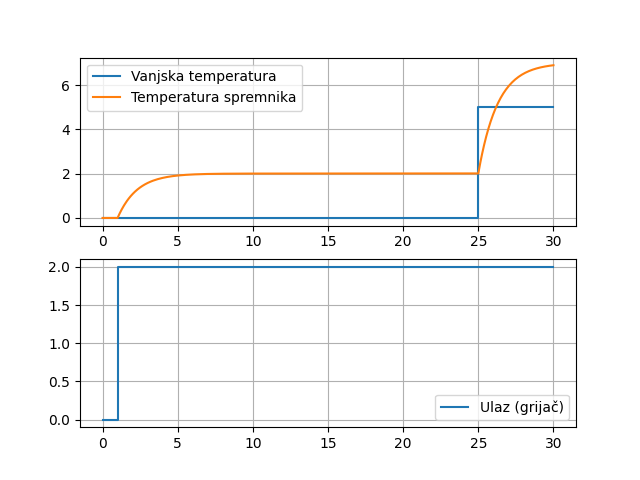

In [130]:
# model bez korektora

blocks = [
    sim.step(y0=0, y1=2, t_step=1),  #0                  ulazni signal - grijač
    sim.step(y0=0, y1=5, t_step=25), #1                  ulazni signal - vanjska temperatura
    sim.ss(*spremnik_topline(k_h=k_h, k_g=k_g, C_s=C_s),   # parametri spremnika
           [0.0])                                        # početni uvjeti (početna temperatura)
    ]

connections = [
    ((0, 0), (2, 0)),
    ((1, 0), (2, 1)),
]

outputs = [0, 1, 2]

t, y = sim.simulate(blocks, connections, outputs, t_final=30.0)

# vremenski odziv
fig = plt.figure()
fig.set_label('Odziv procesa bez korektora')
ax1=plt.subplot(2, 1, 1)
plt.plot(t, y[:,1], t, y[:,2])
plt.grid()
plt.legend(['Vanjska temperatura', 'Temperatura spremnika'])
ax2=plt.subplot(2, 1, 2)
plt.plot(t, y[:,0])
plt.grid()
plt.legend(['Ulaz (grijač)'])
plt.show()

Na osnovu prijenosne funkcije procesa odredite vremensku konstantu korektora $T_c$ koja će rezultirati tri puta bržim odzivom procesa (u odnosu na odziv bez korektora). Upišite vrijednost u sljedeće polje (umjesto 100.0).

$T_c$ možete odrediti iz jednadžbe regulatora na početku notebook-a: vremenska konstanta nazivnika mora biti 3 puta manja od vremenske konstante brojnika.

In [131]:
Tc = 100.0

print(f"Tc={Tc:.2f}")
if(Tc==100.0): print("\nNiste upisali Tc!!!")

Tc=100.00

Niste upisali Tc!!!


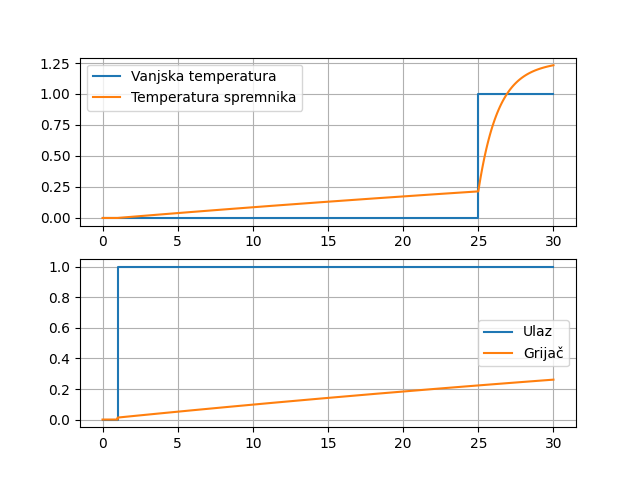

In [132]:
# model sustava s korektorom
Gc = sim.tf([C_s/k_g, 1], [Tc, 1])   # ukupna prijenosna funkcija direktne grane i korektora
blocks = [
    sim.step(y0=0, y1=1, t_step=1),  #0
    sim.step(y0=0, y1=1, t_step=25), #1
    Gc,
    sim.ss(*spremnik_topline(k_h=k_h, k_g=k_g, C_s=C_s),   # parametri spremnika
           [0.0])                                        # početni uvjeti (početna temperatura)
    ]

connections = [
    ((0, 0), (2, 0)),
    ((1, 0), (3, 1)),
    ((2, 0), (3, 0)),    
]

outputs = [0, 1, 2, 3]

t, y = sim.simulate(blocks, connections, outputs, t_final=30.0)

# vremenski odziv
fig = plt.figure()
fig.set_label('Odziv procesa s korektorom vodeće vrijednosti')
ax1=plt.subplot(2, 1, 1)
plt.plot(t, y[:,1], t, y[:,3])
plt.grid()
plt.legend(['Vanjska temperatura', 'Temperatura spremnika'])
ax2=plt.subplot(2, 1, 2)
plt.plot(t, y[:,0], t, y[:,2])
plt.grid()
plt.legend(['Ulaz', 'Grijač'])
plt.show()